# Шмаков В.Е. Б04-105


## Задача 1. Двухслойные итерационные методы. (2 балла).


Система линейных уравнений имеет матрицу

$$
\begin{aligned}
& A=\left(\begin{array}{ll}
10 & 4 \\
4 & -10
\end{array}\right)
\end{aligned}
$$
1) Сходится ли метод Якоби ?

2) Сходится ли метод Зейделя?

3) Напишите метод релаксации для этой задачи с оптимальным значением параметра, постройте график зависимости числа итераций от требуемой точности.


Система оценивания:

1 балл - правильный ответ на первые 2 вопроса.

1 балл - сделан пункт 3.


**В матрице присутствует диагональное преобладание(10 > 8). Значит методы Зейделя и Якоби сходятся(согласно достаточному условию).**


## Задача 2. Спектр матрицы и функции от матриц. (3 балла).

Создайте матрицу $A$ размера $32 \times 32$, задаваемую следующей формулой:
$$
A_{i j}=-2\delta_{i, j}+\delta_{i, j-1}+\delta_{i, j+1}
$$

- Найдите спектр матрицы $A$. (1 балл)
- Используя функцию scipy.linalg.expm, постройте $\left\|e^{A t}\right\|_{2}$ как функцию $t$ на интервале $0 \leq t \leq 50 .$ (1 балл)
- Найдите псевдоспектр матрицы А и визуализуйте его (1 балл)

Для нахождения псевдоспектра делайте малые возмущения матрицы А

$$
\Lambda_{\epsilon}(A)=\left\{\lambda \in \mathbb{C}: \exists E, x \neq 0:(A+E) x=\lambda x, \quad\|E\|_{2} \leq \epsilon .\right\}
$$

Одним цветом  (например, красным) можно отметить точки на комплексной плоскости, соответствующие собственным значениям А,  а вокруг них соединить в плавные замкнутые линии точки, соответствующие значениям возмущённых матриц, изобразив их другим цветом (например, чёрным).

In [46]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

[-3.99094385 -3.96385739 -3.91898595 -3.85673587 -3.7776709  -3.68250707
 -3.57210619 -3.44746808 -3.30972147 -3.16011382 -3.         -2.83083003
 -2.65413593 -2.47151787 -2.28462968 -2.09516383 -1.90483617 -1.71537032
 -1.52848213 -1.34586407 -1.16916997 -0.00905615 -0.03614261 -0.08101405
 -0.14326413 -0.2223291  -0.31749293 -0.42789381 -0.55253192 -0.69027853
 -0.83988618 -1.        ]


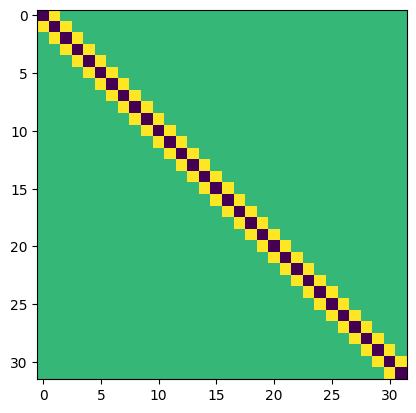

In [60]:
N = 32
A = np.zeros(shape = (N, N))
for i in np.arange(N) + 1:
    for j in np.arange(N) + 1:
        A[i - 1, j - 1] = -2 * (i == j) + (i == j - 1) + (i == j + 1)
l, h = np.linalg.eig(A)
plt.imshow(A)
print(l)

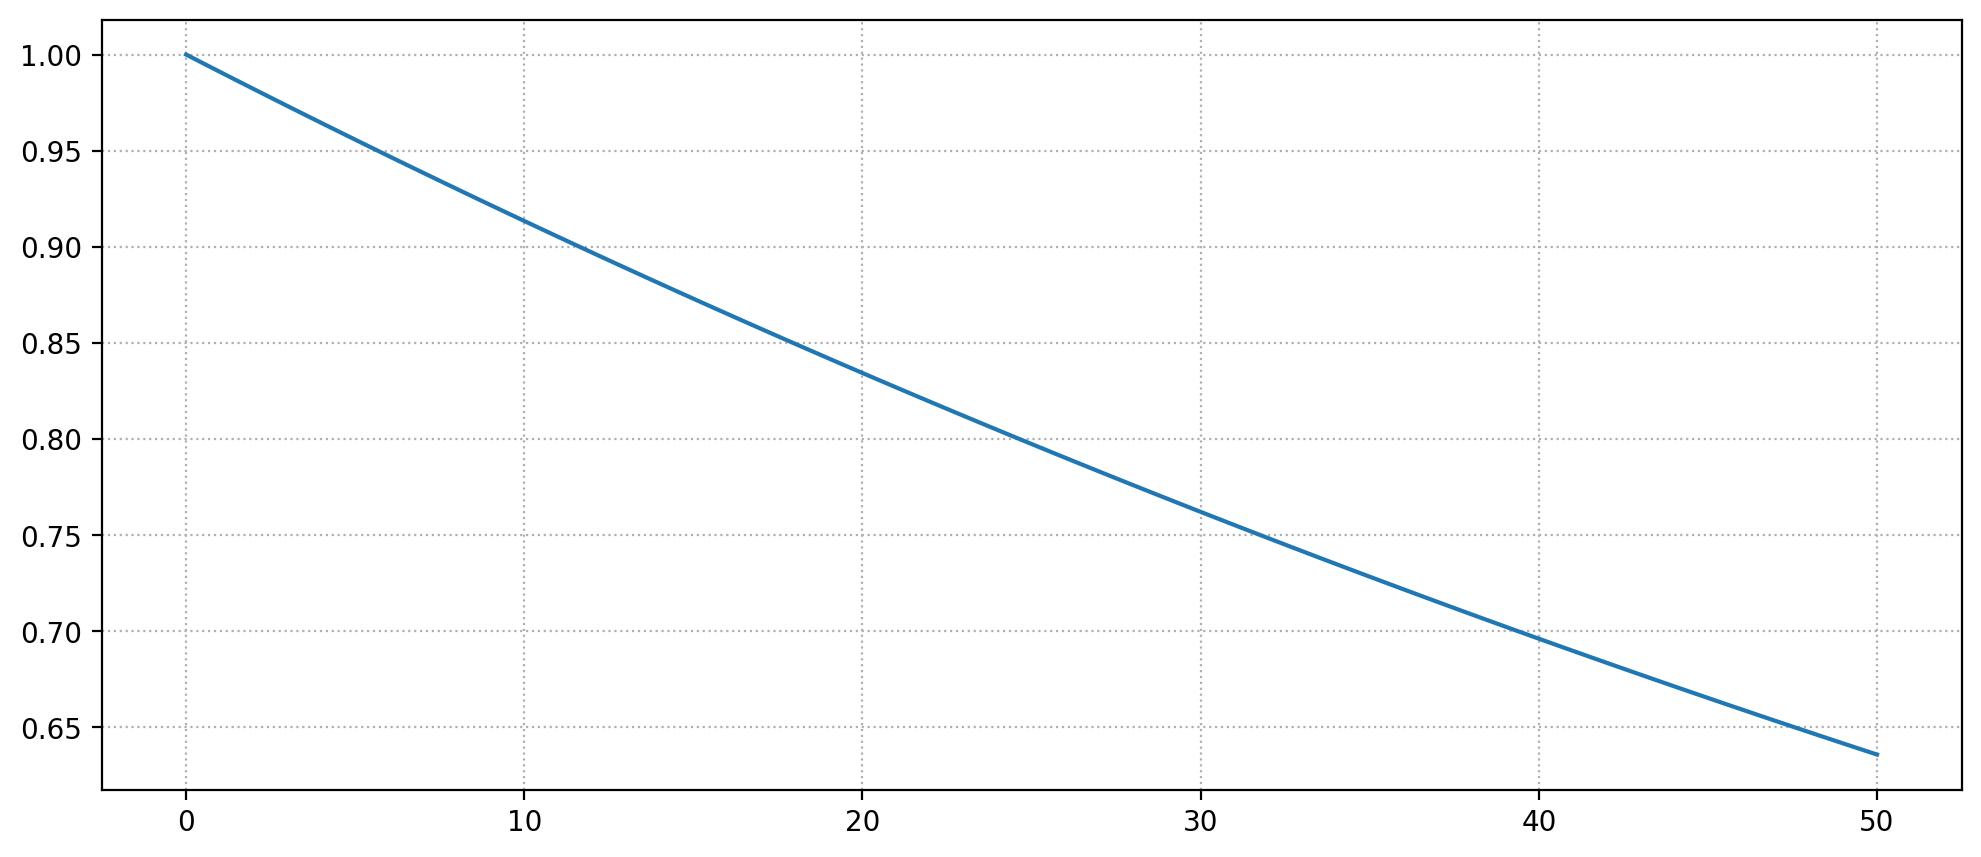

In [48]:
t_vals = np.linspace(0, 50, 100)
exp_norm_2 = [np.linalg.norm(lin.expm(A * t), ord = 2) for t in t_vals]
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(t_vals, exp_norm_2)
plt.grid(ls = ':')

In [78]:
experiment_num = 10000
lambda_values = np.zeros(shape = (experiment_num, N), dtype = complex)
eps = 0.5
for i in range(experiment_num):
    E_matrix = np.random.random((N, N)) * eps
    lambda_values[i] = np.linalg.eigvals(A + E_matrix)

Text(0, 0.5, 'Im')

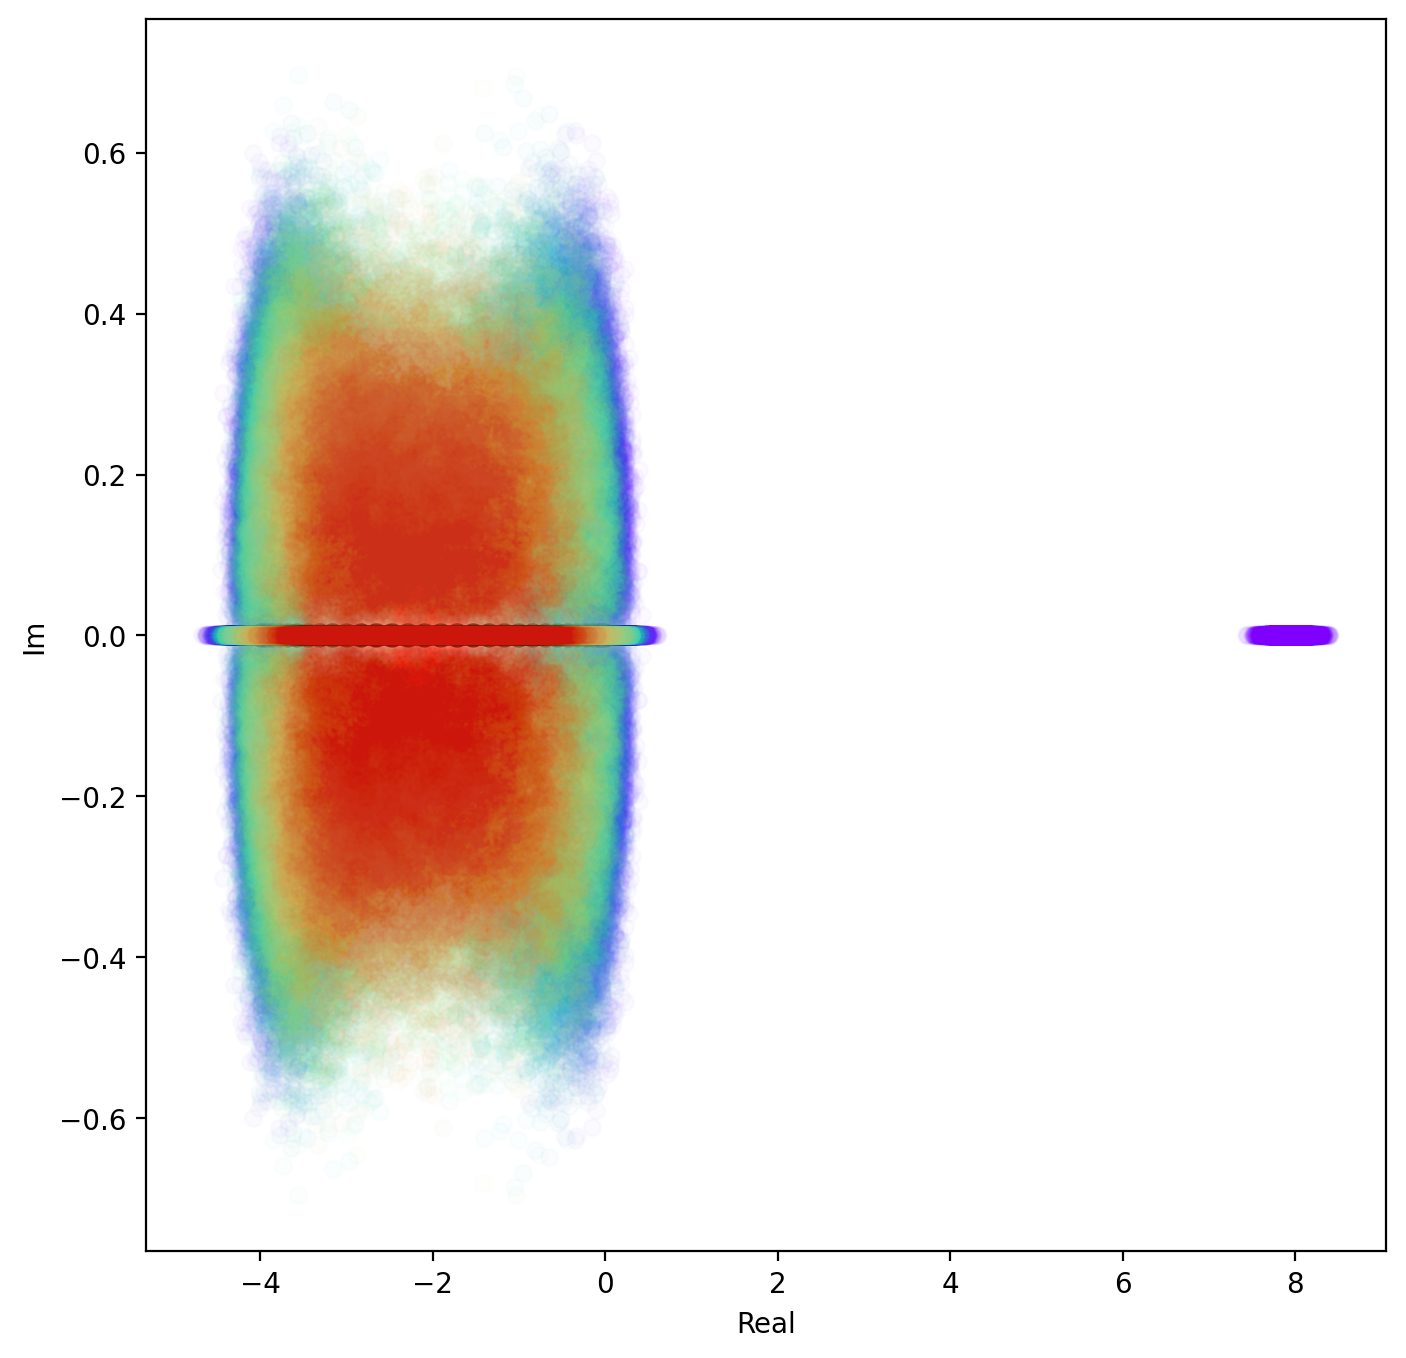

In [79]:
plt.figure(figsize = (8, 8), dpi = 200)
colors = plt.cm.rainbow(np.arange(N) / N)
plt.scatter(l.real, l.imag, color = colors, s = 60, edgecolors = 'k')
for i in range(N):
    plt.scatter(lambda_values[:, i].real,lambda_values[:, i].imag, color = plt.cm.rainbow(i / N), alpha = 0.02)
plt.xlabel("Real")
plt.ylabel("Im")

## Задача 3. Экстремальное собственное значение и соответствующий собственный вектор. (3 балла).

Управляющий активами Neurozhaika Capital Management noлучил от своих аналитиков корреляционную матрицу трёх фондовых индексов,

$$
\mathbf{C}=\left(\begin{array}{ccc}
1 & 0.9 & 0.7 \\
0.9 & 1 & 0.4 \\
0.7 & 0.4 & 1
\end{array}\right)
$$

Коэффициент корреляции $0.4$ кажется ему завышенным, и он хочет поиграть с этой величиной, промоделировав гипотетический портфель, заменив $0.4$ на $0.3$. Найдите собственнные значения исходной ${\mathbf{C}}_{0} $ и возмущённой $\overline{\mathbf{C}}_{0} $ матриц. Несмотря на относительно малое возмущение и разумный вид возмущённой матрицы какие-то из собственных значений станут отрицательными, и матрица $\overline{\mathbf{C}}_{0}$ не будет положительно определенной, что неприемлемо. Рассмотрите следующий "спектральный" рецепт восстановления свойств корреляционной матрицы:


- Посчитать все собственные значения $\lambda_{i} $  и собственные векторы возмущённой матрицы. Ввести новые собственные значения по правилу $\lambda_{i}^{\prime} = \lambda_{i}$, если $\lambda_{i} \geq 0$, иначе $\lambda_{i}^{\prime}=0$
- Умножить собственные векторы на модифицированные собственные значения $\lambda_{i}^{\prime}$ , и использовать их в качестве столбцов новой матрицы $\mathbf{B}^{\prime}$ .
- Отнормировать строки матрицы $\mathbf{B}^{\prime}$ (векторы) на единичную длину, получив тем самым новую матрицу $\mathbf{B}$.
- Построить новую возмущённую корреляционную матрицу по правилу $\overline{\mathbf{C}}_{1}=\mathbf{B B}^{T}$.

Полученная таким образом матрица $\overline{\mathbf{C}}_{1}$ будет положительно определенной с единицами на главной диагонали, то есть отвечать формальным требованиям, предъявляемым к корреляционной матрице. Найти численно матрицу $\overline{\mathbf{C}}_{1}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
C_zero = np.array([
    [1, 0.9, 0.7], 
    [0.9, 1, 0.4], 
    [0.7, 0.4, 1]
    ])
C_zero_cap = np.array([
    [1, 0.9, 0.7], 
    [0.9, 1, 0.3], 
    [0.7, 0.3, 1]
    ])
l_cap, h_cap = np.linalg.eig(C_zero_cap)
l_new = []

for l in l_cap:
    l_new.append((l > 0) * l)
print(l_new)
print(l_cap)

[2.2967277925008607, -0.0, 0.710624646905036]
[ 2.29672779 -0.00735244  0.71062465]


In [18]:
B = np.array([h_cap[:, i] * l_new[i] for i in range(C_zero_cap.shape[0])]).T
print(B)

[[ 1.51564936 -0.         -0.05269537]
 [ 1.31142234  0.         -0.42444587]
 [ 1.12157791  0.          0.56750004]]


In [20]:
B_star = B / np.linalg.norm(B, ord = 1, axis = 1)
print(B_star)

[[ 0.96640064 -0.         -0.03119772]
 [ 0.83618245  0.         -0.2512885 ]
 [ 0.71513481  0.          0.33598215]]


In [22]:
C_1 = B_star @ B_star.T
print(C_1)
print(np.linalg.eigvals(C_1))

[[0.9349035  0.81592688 0.68062487]
 [0.81592688 0.762347   0.51355473]
 [0.68062487 0.51355473 0.6243018 ]]
[2.14454909e+00 3.38706258e-17 1.77003212e-01]


## Задача 4. Решение нелинейных уравнений и систем, локализация корней. (4 балла).

Вавилонский метод вычисления квадратных корней выглядит следующим образом

$$
\begin{aligned}
& x_0 \approx \sqrt{S}, \\
& x_{n+1}=\frac{1}{2}\left(x_n+\frac{S}{x_n}\right), \\
& \sqrt{S}=\lim _{n \rightarrow \infty} x_n .
\end{aligned}
$$

Его недостатком является то, что он использует операцию деления, которая вычисляется меддленнее, чем умножение. А преимуществом - то, что он сходится при любом начальном приближении.

Обычно на практике используют комбинацию вавилонского метода с более быстрыми методами (например, методом Ньютона). Дело в том, что более быстрые методы обычно сходятся, только если начальное значение близко к квадратному корню.  Например, можно использовать метод Ньютона для уравнения
$$
\left(1 / x^2\right)-\left(1 / S\right)=0
$$

Каким должно быть начальное приближение, чтобы он сходился?
Реализуйте этот алгоритм (сначала вычисляем достаточно хорошее начальное приближение, затем вычисляем корень точнее методом Ньютона).



+1 балл за реализацию Вавилонского метода вычисления корней.

+1 балл за правильную реализацию вычисления и выбора начального приближения для метода Ньютона.

+1 балл за реализацию метода Ньютона для указанного уравнения.

+1 балл, если алгоритм полностью правильно работает для вычисления корней с любым начальным приближением.



In [27]:
def vavilon_method(S: float, sqrt_approximation: float, max_iter: int = int(1e5), eps: float = 1e-1) -> float:
    """Вавилонский метод вычисления корня

    Args:
        S (float): _description_
        sqrt_approximation (float): _description_
        max_iter (int, optional): _description_. Defaults to int(1e5).

    Returns:
        float: _description_
    """
    x = sqrt_approximation
    for _ in range(max_iter):
        if np.abs(np.power(x, 2) - S) < eps:
            return x
        x = 0.5 * (x + S / x)
    raise(ArithmeticError("Не сошлось( до заданной точности")) 

def newton(z0, f: callable, derivative: callable, MAX_IT = int(1e4), eps = 1e-8):
    z= z0
    for _ in range(MAX_IT):
        dz = f(z) / derivative(z)
        if abs(dz) < eps:
            return z
        z -= dz
    raise(ArithmeticError("Не сошлось( до заданной точности")) 

In [39]:
def algo(S: float, sqrt_approximation) -> float:
    newton_start = vavilon_method(S, sqrt_approximation, max_iter = int(1e6), eps = 0.1)
    f = lambda x: 1 / np.power(x, 2) - 1 / S
    derivative_f = lambda x: -2 / np.power(x, 3)
    return newton(newton_start, f, derivative_f, eps = 1e-6)

In [33]:
print(round(algo(9, 5), 6))

3.0


##### Тесты

In [42]:
values = [9, 36, 1e4, 16, 49]
right_ans = [3, 6, 1e2, 4, 7]
for v, r in zip(values, right_ans):
    results = []
    for _ in range(100):
        results.append(algo(v, np.random.random() * 1e20))
    print(np.allclose(results, r * np.ones(100)))

True
True
True
True
True
